In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Crop Image

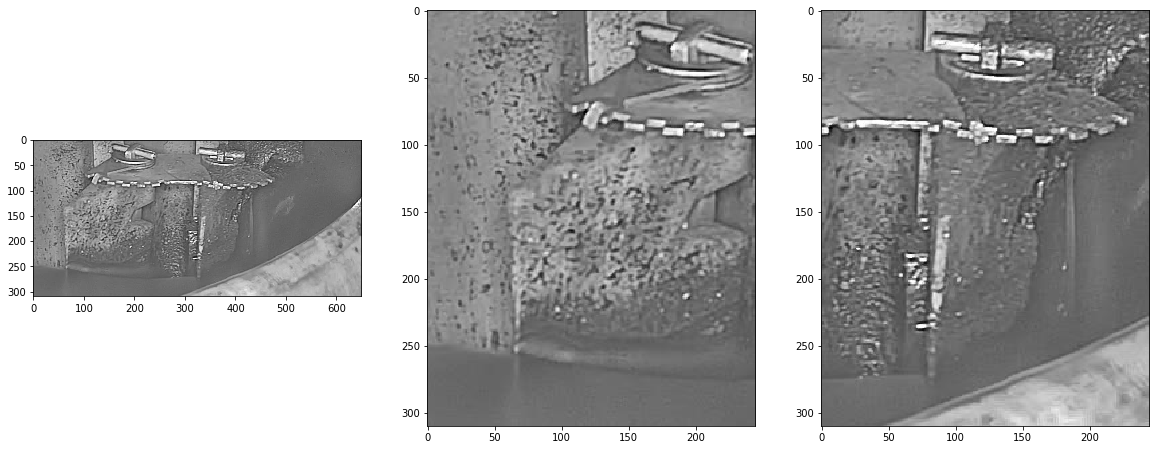

In [153]:
img = cv2.imread('new_data/source3_003.bmp', cv2.IMREAD_GRAYSCALE)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# y1:y2, x1:x2
y1_y2 = slice(440, 750)
left_start = 1050
right_start = 1295
size_left_and_right = 245

both_wings = im_rgb[y1_y2, left_start:1700]
left_wings = im_rgb[y1_y2, left_start:left_start+size_left_and_right]
right_wings = im_rgb[y1_y2, right_start:right_start+size_left_and_right]


all_img = [both_wings, left_wings, right_wings]


fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 1
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(all_img[i-1])
plt.show()

In [110]:
a = np.array(left_wings)
a.shape

(310, 245, 3)

# Save in different folders

In [26]:
# Получение всех имен в директорию
def list_all_files_in_directory(mypath = 'new_data'):
    from os import listdir
    from os.path import isfile, join

    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    all_files = []
    for ele in sorted(onlyfiles):
        all_files.append(ele)
    return all_files


In [79]:
all_files_name = list_all_files_in_directory()
source1 = all_files_name[1:313]

In [121]:
source2 = all_files_name[313:393]

In [125]:
source2[0]

'source2_001.bmp'

In [146]:
source3 = all_files_name[393:]

In [160]:
# y1:y2, x1:x2
y1_y2 = slice(440, 750)
left_start = 1050
right_start = 1295
size_left_and_right = 245


for i in range(275, 313):
    img = cv2.imread('new_data/{}'.format(source3[i]), cv2.IMREAD_GRAYSCALE)
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #both_wings = im_rgb[y1_y2, left_start:1550]
    #left_wings = im_rgb[y1_y2, left_start + 100:left_start+size_left_and_right+100]
    right_wings = im_rgb[y1_y2, right_start + 100:right_start+size_left_and_right+100]

    #cv2.imwrite('dataset/left/{}'.format(source3[i]), left_wings)
    cv2.imwrite('dataset/right/{}'.format(source3[i]), right_wings)
    #cv2.imwrite('dataset/both/{}'.format(source3[i]), both_wings)

# Brute Force Method

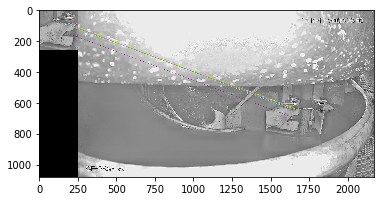

In [28]:
img1 = cv2.imread('a.bmp', cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('new_data/source1_001.bmp', cv2.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1, img2, kp2, matches[:12], None, flags=2)

plt.imshow(img3),
plt.show()

### Data Augmentation
Then:
* Left_1 ~500
* Left_2-7 ~50

After:
* Left_1 ~500
* Left_2-7 ~400


In [51]:
#!pip install Augmentor
import Augmentor
p = Augmentor.Pipeline("clear_dataset/right/1")

Initialised with 180 image(s) found.
Output directory set to clear_dataset/right/1/output.

In [52]:
# OK
p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=4)
p.sample(200)

Processing <PIL.Image.Image image mode=RGB size=245x310 at 0x12C61D7F0>: 100%|██████████| 200/200 [00:01<00:00, 163.21 Samples/s]                


### Blur Converter

In [ ]:
import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np

def blur(image, tuple, name):
    image = cv2.blur(image, tuple)
    cv2.imwrite(Folder_name + "/blur-" + str(tuple[0]) + name, image)

# Получение всех имен в директорию
def list_all_files_in_directory(mypath = 'new_data'):
    from os import listdir, mkdir
    from os.path import isfile, join, exists

    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    if (not exists(mypath+"/output")):
        mkdir(mypath+"/output")
    all_files = []
    for ele in sorted(onlyfiles):
        all_files.append(ele)
    return all_files

def get_all_image(path):
    all_images_in_directory = list_all_files_in_directory(path)
    images = []

    all_images_in_directory = all_images_in_directory
    for i in range(len(all_images_in_directory)):
        image = cv2.imread(path+"/"+all_images_in_directory[i]) 
        blur(image, (4,4), all_images_in_directory[i])
        blur(image, (6,6), all_images_in_directory[i])

Extension = ".jpg"
for x in range(1, 8):
    Folder_name = "D:/photo_2/right/{}/output".format(x)
    get_all_image("D:/photo_2/right/{}".format(x))


### Split Data

In [63]:
import numpy as np
import shutil

In [73]:
from os import listdir, mkdir
from os.path import isfile, join, exists
import numpy as np
np.random.seed(1)

def split_data(train_dir, val_dir):
    for i in range(1, 8):
        all_images_in_directory = list_all_files_in_directory(train_dir + '/' + str(i))
        random = np.random.randint(0, len(all_images_in_directory)-1, 40)
        print(random)
        for j in range(len(random)):
            if (not exists(val_dir + "/" + str(i))):
                mkdir(val_dir + "/" + str(i))
            if (exists(val_dir + "/" + str(i) + "/" + all_images_in_directory[random[j]])):
                continue
            shutil.move("{}/{}/{}".format(train_dir, i, all_images_in_directory[random[j]]), 
                        val_dir + "/" + str(i))

In [76]:
folder = 'right_train'
move_to_folder = 'right_val'

split_data('clear_dataset/{}'.format(folder), 
           "/Users/vakurin/Desktop/Comtech_data/clear_dataset/{}".format(move_to_folder))

### Move source2 video to eval folder 

In [42]:
import os
import shutil


path = '/Users/vakurin/Documents/Study/Code/TF2/comtech/\
dataset/small_data_for_training_eval_source_video_2/left_train_small/3'

path_val = '/Users/vakurin/Documents/Study/Code/TF2/comtech/\
dataset/small_data_for_training_eval_source_video_2/left_val_small/3'

index = 0
all_index = []

all_files = os.listdir(path)

for f_name in os.listdir(path):
    if f_name.find('source2') > -1:
        all_index.append(index)
    index += 1


for i in range(len(all_index)):
    shutil.move("{}/{}".format(path, all_files[all_index[i]]), 
                            path_val + "/")